# Lecture 17 - Feature Selection

# Feature Selection

Suppose that you are building the experimental design for your machine learning algorithm from a provided data set. Your first setp should include feature selection. 

In this section, we will discuss a few techniques to perform feature selection.

### Example: Wine Dataset

Let's work through with the Wine dataset, an open-source dataset that is available from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Wine); it consists of 178 wine samples with 13 features describing their different chemical properties.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

df_wine.head(120)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407
116,2,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495
117,2,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372


In [3]:
print('Class labels ', np.unique(df_wine['Class label']))

Class labels  [1 2 3]


In [13]:
df_wine.shape

(178, 14)

In [15]:
df_wine['Class label'].values.shape

(178,)

The samples belong to one of three different classes, 1, 2, and 3, which refer to the three different types of grapes that have been grown in different regions in Italy.

In [11]:
t = df_wine['Class label'].values

X = df_wine.drop(['Class label'], axis=1).values #We drop the column because it is the target/output we want to predict — and it should not be part of the input features.

X.shape, t.shape

((178, 13), (178,))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                    test_size=0.3, 
                                                    stratify=t,
                                                   random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #StandardScaler() to normalize/standardize the features, it should be loaded in a variable
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Selecting meaningful features

If we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator for overfitting. Overfitting means that model fits the parameters too closely to the particular observations in the training dataset but does not generalize well to real data—we say that the model has a high variance. A reason for overfitting is that our model is too complex for the given training data and common solutions to reduce the generalization error are listed
as follows:

* Collect more training data

* Introduce a penalty for complexity via regularization

* Choose a simpler model with fewer parameters

* Reduce the dimensionality of the data

Let's look at common ways to reduce overfitting by regularization and dimensionality reduction via feature selection. 

In **feature selection**, we can have three main approaches:

1. **Filters:** for a much faster alternative, filters do not test any particular algorithm, but rank the original features according to their relationship with the problem (labels) and just select the top of them. Correlation and mutual information are the most widespread criteria. There are many easy to use tools, like the [feature selection ```scikit-learn``` package](https://scikit-learn.org/stable/modules/feature_selection.html).
    * Example: Correlation, chi-squared test, ANOVA, information gain, etc.

2. **Wrappers:** a wrapper evaluates a specific model sequentially using different potential subsets of features to get the subset that best works in the end. They are highly costly and have a high chance of overfitting, but also a high chance of success, on the other hand.
    * Example: Forward Sequential Feature Selection, Backward Feature Elimination, etc.

3. **Embedded:** this group is made up of all the Machine Learning techniques that include feature selection during their training stage. 
    * Example: LASSO, Elastic Net, Ridge, etc.

---------------------------------------------------------------
Sure! I’ll explain the whole thing in **very easy, baby-friendly language** so you understand it instantly.
Let’s break it down ✨

---

# 🎯 **What is this whole page talking about?**

It is explaining:

### ✔ Why models overfit

### ✔ And how to pick **important features** to avoid overfitting

---

# 😢 **What is overfitting? (SUPER SIMPLE)**

Your model **memorizes the training data** instead of learning patterns.
So it becomes **smart in class** (training data) but **dumb in real life** (test data).

---

# 🎯 **How to reduce overfitting? (Simple)**

1️⃣ Get more training data
2️⃣ Add regularization (punishment for being too complex)
3️⃣ Use a simpler model
4️⃣ Reduce the number of features (this is the topic = feature selection)

---

# 🌟 **What is Feature Selection?**

Feature selection means:
👉 **Choose only the most important columns/features** from your dataset
👉 Remove useless or noisy features
👉 This makes the model simpler and prevents overfitting

---

# 🌈 **There are 3 easy ways to select important features**

## **1. Filters (Fastest)**

Think of this as:

🥇 “Rank the features and keep the best ones.”

The model is NOT used here.
You just check which features correlate with the label.

### Examples:

* Correlation
* Chi-square
* ANOVA
* Mutual Information

👉 This is like picking top students by their scores.

---

## **2. Wrappers (Slow, but powerful)**

Here you **try different feature combinations** and test which combination gives the best accuracy.

### Example methods:

* Forward selection: start with zero features and add one by one
* Backward elimination: start with all features and remove the worst one each time

👉 This is like trying many recipes to find the best one.

---

## **3. Embedded Methods (Built into the model)**

Some models **automatically select features** during training.

### Examples:

* LASSO
* Ridge
* Elastic Net

👉 This is like a smart cooker that chooses ingredients while cooking.

---

# 🧸 Ultra Simple Summary (Baby Language)

### 📌 **Filters:**

Just look at features → choose strongest ones.
(No model is trained)

### 📌 **Wrappers:**

Try many feature combinations → choose the best.
(Expensive, slow)

### 📌 **Embedded:**

Model automatically picks features while training.
(Convenient + powerful)

---

-----------------------------------------------------------------

---

## 1. Embedded: Sparse solutions with L1 regularization

Recall our Linear Regression problem where we used the **L2 regularization** approach to reduce the complexity of a model by penalizing large individual weights, where we defined the L2 norm of our weight vector $\mathbf{w}$ as follows:

$$\text{L2: }\Vert\mathbf{w}\Vert_2^2 = \sum_{j=0}^M w_j^2$$

Another approach to reduce the model complexity is the related **L1 regularization**:

$$\text{L1: }\Vert\mathbf{w}\Vert_1 = \sum_{j=0}^M |w_j|$$

In contrast to L2 regularization, L1 regularization yields sparse feature vectors; most feature weights will be zero. Sparsity can be useful in practice if we have a high-dimensional dataset with many features that are irrelevant, especially cases where we have more irrelevant dimensions than samples. In this sense, L1 regularization can be understood as a technique for feature selection.

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [31]:
lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
lr

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [32]:
lr.fit(X_train, t_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

✅ What is a coefficient?

A coefficient is just a number that tells you:

👉 how strongly a feature affects the output

and

👉 in what direction it affects the output

It is the weight given to a feature in a linear model.

In [33]:
print('Training coefficient of determination, R^2: ',lr.score(X_train, t_train))

Training coefficient of determination, R^2:  0.9596774193548387


Because scikit-learn’s LinearRegression class is built so that:

👉 .score() = R² score

Not accuracy, not MSE — only R².

R² tells you how well your model fits the data.

More specifically:

R² = How much of the variation in the output (t) is explained by the model.

R² = 1.0 → perfect prediction

R² = 0 → model is as good as predicting mean

R² = negative → model is worse than predicting mean (very bad fit)

In [25]:
print('Test coefficient of determination, R^2: ',lr.score(X_test, t_test))

Test coefficient of determination, R^2:  0.3333333333333333


Both training and test accuracies (both 98 percent) do not indicate any overfitting of our model. When we access the intercept terms via the lr.intercept_ attribute, we can see that the array returns three values:

Why is it called “coefficient of determination”?

It means:

✔ How well the features “determine” the target.
✔ How much information your inputs give about the output.

If R² = 0.80, that means:

👉 “80% of the variation in the output is explained by the model,
20% is random noise or missing factors.”

In [34]:
lr.intercept_ #The intercept is the value your model predicts when all features are 0.

array([-0.31870052, -0.09903497, -0.81389056])

Since we the fit the LogisticRegression object on a multiclass dataset, it uses the One-vs-Rest (OvR) approach by default where the first intercept belongs to the model that fits class 1 versus class 2 and 3; the second value is the intercept of the model that fits class 2 versus class 1 and 3; and the third value is the intercept of the model that fits class 3 versus class 1 and 2, respectively:

✅ What is One-vs-Rest (OvR)?

It is a method to turn binary classifiers (like logistic regression) into multiclass classifiers.

👉 You create one model per class
👉 Each model learns to predict:

“Is this class OR not?”

So for 3 classes, you build 3 separate models:

Model 1: class 1 vs. classes 2 & 3

Model 2: class 2 vs. classes 1 & 3

Model 3: class 3 vs. classes 1 & 2

📌 Why logistic regression uses OvR?

Because logistic regression is naturally binary (two-class).
To handle 3 or more classes, scikit-learn automatically does OvR unless you tell it otherwise.

--------------
✅ What is coef_ ?

In scikit-learn, for linear models:

coef_ = the coefficients (weights) for each feature.

These numbers tell you:

how important each feature is

whether it increases or decreases the prediction

by how much

In [27]:
lr.coef_

array([[ 0.21939127,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54247841,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.51493013],
       [-0.76613965, -0.04062782,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.82390448,
         0.00712965,  0.06460147, -0.41588548],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.74398613,  0.        ,  0.        ,  0.42986355,
        -0.3193175 , -0.51895683,  0.        ]])

The weight array that we accessed via the lr.coef_ attribute contains three rows of weight coefficients, one weight vector for each class. Each row consists of 13 weights where each weight is multiplied by the respective feature in the 13-dimensional Wine dataset to calculate the net input:

$$\mathbf{y} = \phi(w_0x_0 + w_1x_1 + \cdots + w_M x_M) = \phi\left(\sum_{j=0}^M x_j w_j\right) = \phi\left(\mathbf{w}^T\mathbf{x}\right)$$

where $\phi(\bullet)$ is the sigmoid function, $\phi(x)=\frac{1}{1+e^{-x}}$.

We notice that the weight vectors are sparse, which means that they only have a few non-zero entries. As a result of the L1 regularization, which serves as a method for feature selection, we just trained a model that is robust to the potentially irrelevant features in this dataset.

<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\l'
C:\Users\HP\AppData\Local\Temp\ipykernel_14512\1385597683.py:20: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Inverse of Regularizer Hyperparmeter $C=1/\lambda$',size=15)


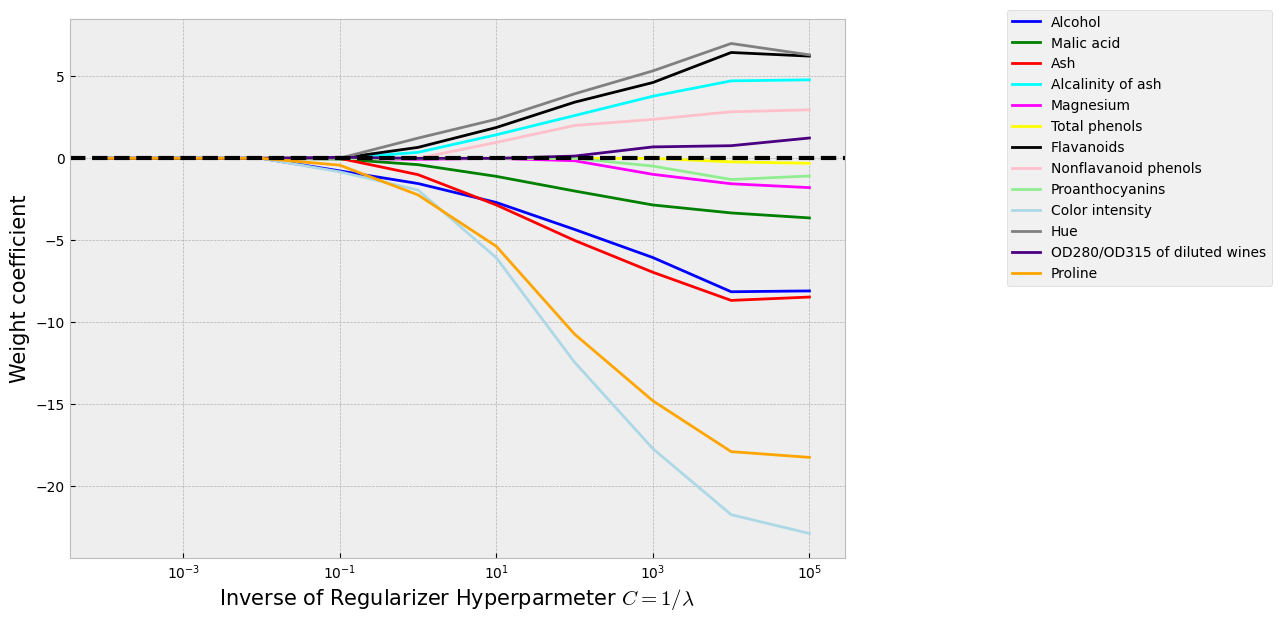

In [28]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black','pink', 'lightgreen',
          'lightblue','gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10.0**c, random_state=0, solver='liblinear')
    lr.fit(X_train, t_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
    w = np.array(weights)
    
for column, color in zip(range(w.shape[1]), colors):
    plt.plot(params, w[:, column], label=df_wine.columns[column+1],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.ylabel('Weight coefficient', size=15)
plt.xlabel('Inverse of Regularizer Hyperparmeter $C=1/\lambda$',size=15)
plt.xscale('log')
plt.legend(loc='upper left',fontsize=25)
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True);

Here is a **simple, step-by-step explanation** of what this code does and what the graph means — in **easy language** 😊

---

# 🎯 **Goal of this code**

This code is used to show **how L1 regularization shrinks coefficients** in Logistic Regression when you change the regularization strength.

Specifically, it plots:

👉 **How each feature’s coefficient changes as you vary C**
👉 **Which features go to zero (become irrelevant)**
👉 **How L1 creates sparse models**

---

# 🧩 **Breakdown of the Code:**

---

# ✔ 1. Create a plot

```python
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
```

Just sets up a blank plot of size 10×7.

---

# ✔ 2. Define colors for plotting

```python
colors = ['blue', 'green', 'red', ...]
```

Each feature will be plotted in a different color.

---

# ✔ 3. Prepare storage lists

```python
weights, params = [], []
```

* `weights` stores the **coefficients** of logistic regression
* `params` stores the **values of C**

You will plot them later.

---

# ✔ 4. Loop over different values of C

```python
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10.0**c, ...)
    lr.fit(X_train, t_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
```

### What this is doing:

* Vary C from (10^{-4}) to (10^{5})
* For each C:

  * Train an **L1 logistic regression**
  * Extract the coefficients (`lr.coef_[1]`)
  * Save them into `weights`
  * Save C into `params`

### ❗Why vary C?

Because **C controls regularization**:

* Small C → **strong regularization** → coefficients shrink to **zero**
* Large C → weak regularization → larger coefficients

---

# ✔ 5. Convert weights to NumPy

```python
w = np.array(weights)
```

Now w is a matrix:

* rows = different C values
* columns = feature coefficients

---

# ✔ 6. Plot each feature’s coefficients

```python
for column, color in zip(range(w.shape[1]), colors):
    plt.plot(params, w[:, column], label=df_wine.columns[column+1], color=color)
```

This draws a line for *each* feature:

* x-axis = C
* y-axis = coefficient value
* color = that feature’s line

---

# ✔ 7. Add a horizontal zero line

```python
plt.axhline(0, color='black', linestyle='--')
```

Helps visually show when a coefficient reaches zero.

---

# ✔ 8. Label the plot

```python
plt.ylabel('Weight coefficient')
plt.xlabel('Inverse of Regularizer Hyperparameter C = 1/λ')
plt.xscale('log')
```

* x-axis is log scale because C changes by powers of 10
* y-axis shows coefficient values

---

# ✔ 9. Add a legend

```python
ax.legend(...)
```

Shows each feature name next to its curve.

---

# 🎨 **What the final plot shows**

### ✨ The L1 path of coefficients

The plot will show ~13 lines (one for each wine feature).

### ✔ When C is small (strong regularization)

Most coefficients → **shrink to zero**
This means L1 keeps only the **most important features**

### ✔ When C is large (weak regularization)

Coefficients get larger because model is allowed to be complex.

### ✔ Where each line touches zero

That feature is **removed by L1**
→ This is feature selection

---

# ⭐ **In One Sentence**

This code shows how L1 regularization forces many coefficients to **become zero** as regularization increases, helping identify the **most important features**.

---------


The resulting plot provides us with further insights about the behavior of L1 regularization. As we can see, all features weights will be zero if we penalize the model with a strong regularization parameter ($\lambda > 0.1$).

## 2. Wrappers: Sequential feature selection algorithms

An alternative way to reduce the complexity of the model and avoid overfitting is dimensionality reduction via feature selection, which is especially useful for unregularized models. There are two main categories of dimensionality reduction techniques: feature selection and feature extraction. 

* Using feature selection, we select a subset of the original features. 
* In feature extraction, we derive information from the feature set to construct a new feature subspace.

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial $d$-dimensional feature space to a $k$-dimensional feature subspace where $k<d$. The motivation behind feature selection algorithms is to automatically select a subset of features that are most relevant to the problem to improve computational efficiency or reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms that don't support regularization. 

A classic sequential feature selection algorithm is **Recursive Feature Elimination (RFE)**, which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in performance of the classifier to improve upon computational efficiency. In certain cases, RFE can even improve the predictive power of the model if a model suffers from overfitting.

The idea behind the RFE algorithm is quite simple: RFE sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need to define criterion function $J$ that we want to minimize. The criterion calculated by the criterion function can simply be the difference in performance of the classifier after and before the removal of a particular feature. Then the feature to be removed at each stage can simply be defined as the feature that maximizes this criterion; or, in more intuitive terms, at each stage we eliminate the feature that causes the least performance loss after removal. Based on the preceding definition of SBS, we can outline the algorithm in 4 simple steps:

1. Initialize the algorithm with $k=d$, where $d$ is the dimensionality of the full feature space $\mathbf{X}_d$.

2. Determine the feature $x^-$ that maximizes the criterion $x^- = \arg\max J(\mathbf{X}_k - x^-)$ where $x \in \mathbf{X}_k$.

3. Remove the feature $x^-$ from the feature set.

4. Terminate if $k$ equals the number of desired features, if not, go to step 2.

---------------------
Okay! Let’s **restart completely** and explain this in **ULTRA BABY LANGUAGE** — as simple as humanly possible.
No fancy words. No math. Just the idea.
Ready? 😊

---

# 🍼 **What are Wrappers? (SUPER SIMPLE)**

Imagine you have **10 toys**, but you want to keep only the **best 3**.

A **wrapper method** does this:

### 👉 Try different combinations of toys

### 👉 Test which combination gives the best result

### 👉 Keep ONLY the toys that help you win

That’s it.
You test → remove things → test again → remove more → until you have the best set.

---

# 🧸 **What is Sequential Feature Selection?**

It is just a **step-by-step way** to choose the best features.

Think of it like:

### ❌ Start with everything

### ✂️ Remove one thing

### 🤔 Check if performance is still good

### ✂️ Remove another thing

### 🤔 Check again

### … keep going …

You remove **one feature at a time**, step by step.

---

# 🍪 **What is RFE? (Recursive Feature Elimination)**

This is the easiest version to understand:

# ⭐ RFE = “Remove the Worst Feature Over and Over”

Yes, that's literally what it does.

### Step 1: Start with ALL features

### Step 2: Remove the WORST feature

(the one that hurts the model the least)

### Step 3: Train again

### Step 4: Remove the next WORST feature

### Step 5: Repeat

### Stop when you have the number of features you want

---

# 🧁 **Example (super easy)**

Suppose you have **5 features**:

1. Alcohol
2. Sugar
3. Color
4. pH
5. Weight

The model tests them and finds:

* Alcohol: very important
* Sugar: important
* Color: not important
* pH: useless
* Weight: tiny effect

### RFE will remove features like this:

❌ Remove **pH**
❌ Remove **Color**
❌ Remove **Weight**
✔ Keep **Alcohol + Sugar** (most important)

Done.

You are left with **only the useful features**.

---

# 🍬 **Why do we do this?**

Because removing bad features:

* Makes the model simpler
* Makes it faster
* Makes it more accurate
* Reduces overfitting

---

# ⭐⭐ **Ultra Short Summary (for your brain)**

### Wrappers = try and test features again and again

### Sequential = remove one at a time

### RFE = remove the worst feature each round

### Goal = keep only the useful features

---

If you want, I can explain:

👉 Forward selection (add features instead of removing)
👉 Visual example
👉 Step-by-step diagram
👉 Code explanation of RFE

Just tell me!

------------

In [35]:
from sklearn.feature_selection import RFE

RFE?

Init signature:
RFE(
    estimator,
    *,
    n_features_to_select=None,
    step=1,
    verbose=0,
    importance_getter='auto',
)
Docstring:     
Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the
coefficients of a linear model), the goal of recursive feature elimination
(RFE) is to select features by recursively considering smaller and smaller
sets of features. First, the estimator is trained on the initial set of
features and the importance of each feature is obtained either through
any specific attribute or callable.
Then, the least important features are pruned from current set of features.
That procedure is recursively repeated on the pruned set until the desired
number of features to select is eventually reached.

Read more in the :ref:`User Guide <rfe>`.

Parameters
----------
estimator : ``Estimator`` instance
    A supervised learning estimator with a ``fit`` method that provides
    information about

In [36]:
lr = LogisticRegression(penalty='l1', C=0.1, random_state=0, 
                        solver='liblinear')
lr

LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='liblinear')

In [37]:
rfe = RFE(estimator=lr, n_features_to_select=12, step=1)
rfe.fit(X_train, t_train)

RFE(estimator=LogisticRegression(C=0.1, penalty='l1', random_state=0,
                                 solver='liblinear'),
    n_features_to_select=12)

In [38]:
rfe.ranking_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [40]:
print(df_wine.columns[1:][rfe.support_==False])

Index(['Ash'], dtype='object')


In [43]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [45]:
# RFE?

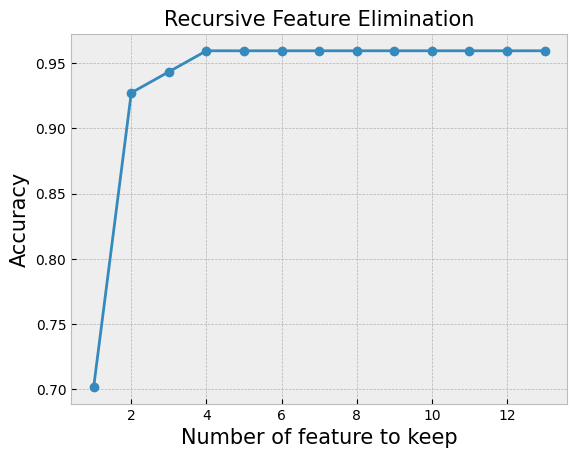

In [46]:
scores=[]
features_to_keep={}

for i in range(13):
    rfe = RFE(estimator=lr, n_features_to_select=13-i, step=1)
    rfe.fit(X_train, t_train)
    scores+=[rfe.score(X_train, t_train)] # this score should actually be on the validation data.
    features_to_keep[13-i]=df_wine.columns[1:][rfe.support_]

plt.plot(range(1,len(scores)+1)[::-1],scores,'-o')
plt.xlabel('Number of feature to keep',size=15)
plt.ylabel('Accuracy', size=15)
plt.title('Recursive Feature Elimination', size=15);

From this plot, we see that the classifier's performance is the same or better when using a smaller subset of features.

In [47]:
features_to_keep

{13: Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
        'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
        'Proanthocyanins', 'Color intensity', 'Hue',
        'OD280/OD315 of diluted wines', 'Proline'],
       dtype='object'),
 12: Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Magnesium',
        'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
        'Proanthocyanins', 'Color intensity', 'Hue',
        'OD280/OD315 of diluted wines', 'Proline'],
       dtype='object'),
 11: Index(['Alcohol', 'Malic acid', 'Magnesium', 'Total phenols', 'Flavanoids',
        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
        'OD280/OD315 of diluted wines', 'Proline'],
       dtype='object'),
 10: Index(['Alcohol', 'Malic acid', 'Total phenols', 'Flavanoids',
        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
        'OD280/OD315 of diluted wines', 'Proline'],
       dtype='object'),
 9: Index(['

In [48]:
rfe = RFE(lr, n_features_to_select=4, step=1)
rfe.fit(X_train, t_train)
rfe.score(X_train, t_train), rfe.score(X_test, t_test)

(0.9596774193548387, 0.3333333333333333)

As always, we should apply cross-validation to determine the best set of features to keep:

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

These are cross-validation tools:

✔ KFold

Cuts the data into K pieces (folds), tests each part.

✔ ShuffleSplit

Randomly shuffles and splits the data many times.

✔ StratifiedKFold

Like KFold but keeps class distribution balanced.

✔ GridSearchCV

Tries many hyperparameter values and picks the best.

Think of these as ways to test your model many times to avoid overfitting.

In [50]:
lr = LogisticRegression(penalty='l1', C=0.1,
                        solver='liblinear')

pipe = Pipeline(steps=[('RFE',RFE(lr)),
                        ('LR',lr)])
pipe

Pipeline(steps=[('RFE',
                 RFE(estimator=LogisticRegression(C=0.1, penalty='l1',
                                                  solver='liblinear'))),
                ('LR',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [51]:
# Cross-validation strategy
cv = StratifiedKFold(n_splits=2, shuffle=True)
#sample size is small
# create a single validation/training sets

# Grid Search
Cvals=np.arange(0.01,1,0.01) #L-1 penalty in Logistic Regression
n_features=range(1,14) # number of features to keep

# Parameter Grid Search
param_grid = dict(RFE__n_features_to_select=n_features)
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring='accuracy')

# Train the model
grid_search.fit(X_train, t_train)

# Apply the best hyperpameter values
print(grid_search.best_params_)
pipe.set_params(**grid_search.best_params_)

# Train the final model with these hyperparameter values
pipe.fit(X_train,t_train)
y_train=pipe.predict(X_train)
print('\n\nTraining Set Performance')
print('Accuracy Score:', 100*pipe.score(X_train, t_train),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train))
print('Performance Report: ')
print(classification_report(t_train,y_train))
print('\n\n')

# Evaluting final model performance in test set
y_test = pipe.predict(X_test)
print('Test Set Performance')
print('Accuracy Score:', 100*pipe.score(X_test, t_test),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test))
print('Performance Report: ')
print(classification_report(t_train,y_train))

{'RFE__n_features_to_select': 3}


Training Set Performance
Accuracy Score: 94.35483870967742 %
Confusion Matrix:
[[38  3  0]
 [ 1 48  1]
 [ 0  2 31]]
Performance Report: 
              precision    recall  f1-score   support

           1       0.97      0.93      0.95        41
           2       0.91      0.96      0.93        50
           3       0.97      0.94      0.95        33

    accuracy                           0.94       124
   macro avg       0.95      0.94      0.95       124
weighted avg       0.95      0.94      0.94       124




Test Set Performance
Accuracy Score: 33.33333333333333 %
Confusion Matrix:
[[18  0  0]
 [21  0  0]
 [15  0  0]]
Performance Report: 
              precision    recall  f1-score   support

           1       0.97      0.93      0.95        41
           2       0.91      0.96      0.93        50
           3       0.97      0.94      0.95        33

    accuracy                           0.94       124
   macro avg       0.95      0.94      

<div class="alert alert-info">
    <b>Feature selection algorithms in scikit-learn</b>

There are many more feature selection algorithms available via scikit-learn. Those include recursive backward elimination based on feature weights, tree-based methods to select features by importance, and univariate statistical tests. A comprehensive discussion of the different feature selection methods is beyond the scope of this book, but a good summary with illustrative examples can be found [here](http://scikit-learn.org/stable/modules/feature_selection.html).
</div>

---

## 3. Filters: Correlation Coefficient

In [52]:
df_wine.corr()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class label,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


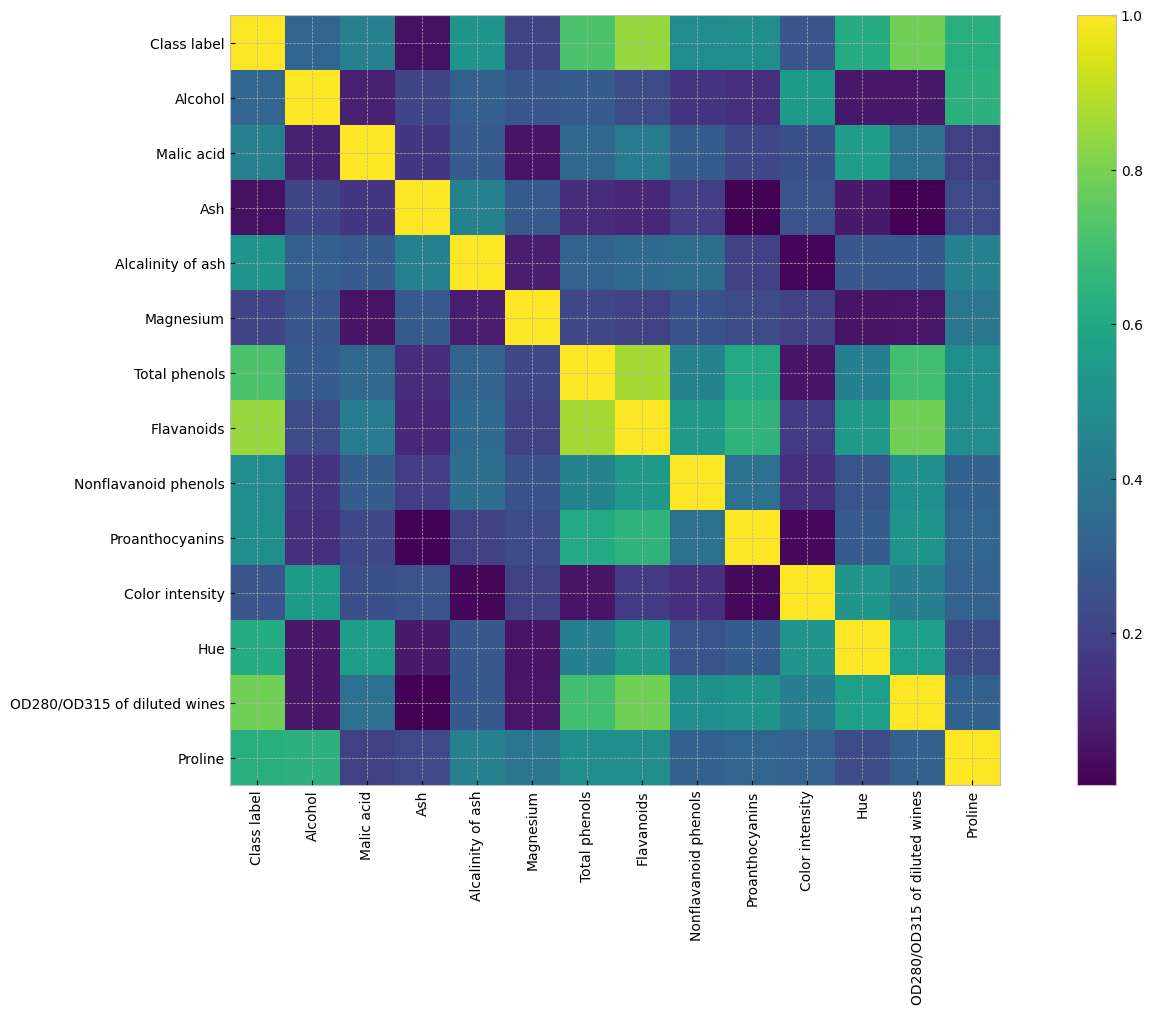

In [53]:
plt.figure(figsize=(20,10))
plt.imshow(df_wine.corr().abs(),cmap='viridis')
plt.colorbar()
plt.xticks(range(14),df_wine.columns.to_numpy(),rotation='vertical')
plt.yticks(range(14),df_wine.columns.to_numpy());

---

You want to take the **correlation matrix** from:

```python
df_wine.corr()
```

and then **create a scatter/bar plot** from it.

Here are **easy ways** to do each type of plot.

---

# ✅ **1. BAR PLOT of Correlation With Target (Easy & Common)**

Usually we plot **correlation of each feature with the class label** as a bar chart.

But your class label is *categorical*, so you should not include `"Class label"` inside `corr()`.

### ✔ Step 1: compute correlation of features only

```python
corr = df_wine.drop("Class label", axis=1).corr()
```

### ✔ Step 2: Pick one row/column to plot (example: Alcohol correlations)

```python
import matplotlib.pyplot as plt

corr_alcohol = corr["Alcohol"]

corr_alcohol.plot(kind="bar", figsize=(10,5))
plt.title("Correlation of Each Feature With Alcohol")
plt.ylabel("Correlation value")
plt.show()
```

---

# ❗If you want **bar plot of all correlations**, use a heatmap instead

Because a bar chart for 13×13 = 169 values is too big.

---

# ✅ **2. SCATTER PLOT Between Two Features**

Do this when you want to visualize relationships:

### Example: Alcohol vs Color intensity

```python
plt.figure(figsize=(6,5))
plt.scatter(df_wine["Alcohol"], df_wine["Color intensity"])
plt.xlabel("Alcohol")
plt.ylabel("Color intensity")
plt.title("Scatter plot: Alcohol vs Color intensity")
plt.show()
```

---

# ✅ **3. SCATTER MATRIX (Pairplot)**

This creates scatter plots for **all feature pairs**.

```python
import seaborn as sns
sns.pairplot(df_wine.drop("Class label", axis=1))
```

---

# ✅ **4. CORRELATION HEATMAP (Most common with corr())**

This is the standard way to visualize a `df.corr()` matrix.

```python
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df_wine.corr(), annot=True, cmap="coolwarm")
plt.show()
```

---

# ⭐ Tell me which one you want:

### 1️⃣ Bar plot of correlations with target

### 2️⃣ Scatter plot between two features

### 3️⃣ Scatter matrix

### 4️⃣ Heatmap of correlation matrix

Just tell me the number and I’ll give you the exact code!
